In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
eps_0 = 1 
Omega = 1
N = 14
V = 1

In [4]:

K_0 = np.zeros([N + 1, N +1])
K_plus_plus = np.zeros([N + 1, N + 1])
K_minus_minus = np.zeros([N + 1, N + 1])


k_0_max = N* .5
k_0_min = -N * .5

k_0_ket = []


k_0 = k_0_min

while (k_0 <= k_0_max):

    k_0_ket.append(k_0)
    k_0 += 1

k_0_bra = k_0_ket


print( len(k_0_ket))
print()

print(K_0[13][13])


15

0.0


In [5]:
def K_0_op(bra, ket):
    
    if bra == ket:
        result = ket
    
    else: 
        result =  0

    return result

def K_plus_op(K_proper, bra, ket): 

    if bra == (ket + 1):

        term1 = np.sqrt( K_proper * (K_proper + 1 )  -  ket * (ket + 1))   
        #term2 = np.sqrt( K_proper * (K_proper + 1 )  + (ket + 1) * ((ket + 1) + 1))

        return term1 #* term2

    else: 
        return 0


def K_minus_op(K_proper, bra, ket): 

    if bra == (ket - 1):

        term1 = np.sqrt( K_proper * (K_proper + 1 )  - ket * (ket - 1))
        #term2 = np.sqrt( K_proper * (K_proper + 1 )  + (ket - 1) * ((ket - 1) - 1))

        return term1 #* term2

    else: 
        return 0

In [6]:
for i in range(len(k_0_ket)):
    for j in range(len(k_0_bra)):
        K_0[i][j] = K_0_op(k_0_bra[j], k_0_ket[i]) 
        K_plus_plus[i][j] =  K_plus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        K_minus_minus[i][j] =  K_minus_op(k_0_max,k_0_bra[j], k_0_ket[i])


In [8]:
H =  eps_0 * K_0 + 0.5 * V* (np.matmul(K_plus_plus, K_plus_plus) +  np.matmul(K_minus_minus, K_minus_minus))

print(H)

[[-7.          0.          9.53939201  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -6.          0.         15.29705854  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 9.53939201  0.         -5.          0.         19.89974874  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         15.29705854  0.         -4.          0.         23.4520788
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.         19.89974874  0.         -3.          0.
  25.98076211  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.         23.4520788   0.         -2.
   0.         27.49545417  0.          0.          0.          0.
   0. 

In [7]:
np.linalg.eigh(H)[0]

array([-9.89949494e+00, -8.48528137e+00, -7.07106781e+00, -5.65685425e+00,
       -4.24264069e+00, -2.82842712e+00, -1.41421356e+00, -3.37088500e-16,
        1.41421356e+00,  2.82842712e+00,  4.24264069e+00,  5.65685425e+00,
        7.07106781e+00,  8.48528137e+00,  9.89949494e+00])

(-20.0, 20.0)

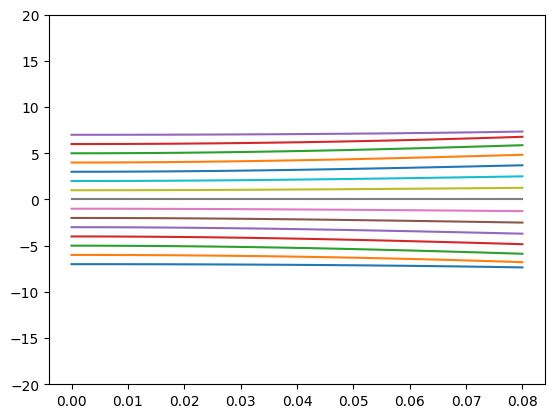

In [9]:
eps_0 = 1 
Omega = 14
V_mesh = np.linspace(0 , 0.08 , 100)


for b in range(15):

    E_val = []

    for c in range(len(V_mesh)):
        for i in range(len(k_0_ket)):
            for j in range(len(k_0_bra)):
                K_0[i][j] = eps_0 * K_0_op(k_0_bra[j], k_0_ket[i]) 
                K_plus_plus[i][j] =  K_plus_op(k_0_max,k_0_bra[j], k_0_ket[i])
                K_minus_minus[i][j] = K_minus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        
        H =  K_0 + (.5 * V_mesh[c]* (np.matmul(K_plus_plus, K_plus_plus) +  np.matmul(K_minus_minus, K_minus_minus)))
        

        E_val.append(np.linalg.eigh(H)[0][b])
    
    plt.plot(V_mesh, E_val)


plt.ylim(-20,20)

In [9]:
for i in range(len(k_0_ket)):
    for j in range(len(k_0_bra)):
        K_0[i][j] = eps_0 * K_0_op(k_0_bra[j], k_0_ket[i]) 
        K_plus_plus[i][j] =  K_plus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        K_minus_minus[i][j] = K_minus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        
H =  K_0 + (.5 * V_mesh[c]* (np.matmul(K_plus_plus, K_plus_plus) +  np.matmul(K_minus_minus, K_minus_minus)))
print(H)

[[-7.          0.          0.76315136  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -6.          0.          1.22376468  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.76315136  0.         -5.          0.          1.5919799   0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          1.22376468  0.         -4.          0.          1.8761663
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          1.5919799   0.         -3.          0.
   2.07846097  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          1.8761663   0.         -2.
   0.          2.19963633  0.          0.          0.          0.
   0. 

In [10]:
V = 1 

for i in range(len(k_0_ket)):
    for j in range(len(k_0_bra)):
        K_0[i][j] = eps_0 * K_0_op(k_0_bra[j], k_0_ket[i]) 
        K_plus_plus[i][j] = 0.5 * V* K_plus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        K_minus_minus[i][j] = 0.5 * V* K_minus_op(k_0_max,k_0_bra[j], k_0_ket[i])

H =  K_0 + (K_plus_plus + K_minus_minus)

print(np.linalg.eigh(H)[0])


[-9.89949494e+00 -8.48528137e+00 -7.07106781e+00 -5.65685425e+00
 -4.24264069e+00 -2.82842712e+00 -1.41421356e+00 -3.37088500e-16
  1.41421356e+00  2.82842712e+00  4.24264069e+00  5.65685425e+00
  7.07106781e+00  8.48528137e+00  9.89949494e+00]


In [11]:
= K_plus_op(k_0_max,k_0_bra[j], k_0_ket[i]) + K_minus_op(k_0_max,k_0_bra[j], k_0_ket[i])

SyntaxError: invalid syntax (79473102.py, line 1)